In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
# Establish connection to the PostgreSQL database

# Defining database credentials
username = 'postgres'
password = ''
host = 'localhost'  
port = '5432'
database = 'ejoheza'

# Create the SQLAlchemy engine
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

# Test the connection
try:
    connection = engine.connect()
    print("Connection to PostgreSQL successful!")
    connection.close()
except Exception as e:
    print(f"An error occurred: {e}")


Connection to PostgreSQL successful!


In [ ]:
# Load data from the SQL tables
member = pd.read_sql('SELECT * FROM public.member', con=engine)
claim = pd.read_sql('SELECT * FROM public.claim', con=engine)
contribution = pd.read_sql('SELECT * FROM public.contribution', con=engine)

In [5]:
# Display the first few rows of each table
print("Members Table:")
print(member.head())
print("\nClaims Table:")
print(claim.head())
print("\nContributions Table:")
print(contribution.head())

Members Table:
                                     id                  updatedAt  createdAt  \
0  53ba3978-6136-4021-92e6-890ecab1a8c3 2024-04-25 22:36:57.140175 2021-03-22   
1  bf8eb4c3-67e0-4e01-a90f-f4c72f5e31be 2024-04-25 22:02:06.473908 2023-11-24   
2  1d569864-64fd-4da1-91b1-81d793672edb 2024-04-24 23:15:14.281018 2020-12-02   
3  a6980144-95b6-474e-85a1-522533d5a8fa 2024-04-25 18:59:18.889136 2021-09-24   
4  0e59c022-807a-4145-9952-cd7b2cc39239 2024-04-25 19:16:44.896745 2020-01-22   

               fullName  status ubudehe                 occupation  \
0    NDOBA Jean de Dieu  ACTIVE   CAT_2  AGRICULTURE_AND_LIVESTOCK   
1       MUHOZA Liberata  ACTIVE    None  AGRICULTURE_AND_LIVESTOCK   
2      NIYONSABA Cecile  ACTIVE   CAT_3  AGRICULTURE_AND_LIVESTOCK   
3  MUKANKUYO ANNE MARIE  ACTIVE   CAT_2  AGRICULTURE_AND_LIVESTOCK   
4     MUKAKALISA Egidie  ACTIVE    None             PRIVATE_SECTOR   

  occupationType     language          dateOfBirth  ...    units guardianId  

In [7]:
# Initial exploratory data analysis
# Check for missing values in the cleaned dataframes
print(member.isnull().sum())
print(contribution.isnull().sum())
print(claim.isnull().sum())

id                      0
updatedAt               0
createdAt               0
fullName                0
status                  0
ubudehe           1498894
occupation              0
occupationType          0
language                0
dateOfBirth           158
gender                  0
phoneNumber       2057906
units                   0
guardianId        3565014
countryId               0
provinceId          10394
districtId          10394
sectorId            10394
cellId              10394
villageId           10394
backOfficerId     3804226
agegroup          3813075
dtype: int64
id                  0
updatedAt           0
createdAt           0
amount              0
isInvested          0
memberId            0
paymentId           0
billId        1970707
dtype: int64
id                          0
updatedAt                   0
createdAt                   0
status                      0
type                        0
reviewedById            14811
rejectionReason         14811
approvedById    

In [19]:
# Clean data (handling missing values)
member = member.dropna(subset=['id', 'gender', 'occupationType'])

In [23]:
contribution['amount'] = contribution['amount'].fillna(0)

In [25]:
claim['benefitPaymentAmount'] = claim['benefitPaymentAmount'].fillna(0)

In [21]:
# Descriptive statistics
print(member.describe())

                           updatedAt                      createdAt  \
count                        3813075                        3813075   
mean   2024-04-29 19:26:13.935316736  2021-12-18 08:47:09.935705600   
min       2024-04-24 20:23:22.544000            2018-01-01 00:00:00   
25%    2024-04-25 00:00:07.467591936            2020-11-09 00:00:00   
50%    2024-04-25 16:14:36.079535104            2022-01-26 00:00:00   
75%    2024-04-25 22:08:20.979992064            2022-12-19 00:00:00   
max       2024-06-24 22:30:44.457916     2024-06-24 22:30:44.457916   
std                              NaN                            NaN   

              units  
count  3.813075e+06  
mean   8.546660e+01  
min    0.000000e+00  
25%    6.230000e-01  
50%    9.332000e+00  
75%    7.736150e+01  
max    9.306805e+04  
std    2.796996e+02  


In [27]:
print(contribution.describe())

                           updatedAt                      createdAt  \
count                       18965566                       18965566   
mean   2024-04-26 20:56:00.982540544  2022-04-22 02:23:37.025539072   
min       2024-04-24 21:08:59.630727            2018-03-14 10:50:41   
25%    2024-04-24 22:53:40.132208128  2021-05-11 17:13:25.798500096   
50%    2024-04-25 03:56:19.913765888  2022-04-28 21:49:46.874000128   
75%    2024-04-25 18:06:11.136530944  2023-02-15 17:18:46.436249856   
max       2024-06-24 23:51:59.098007     2024-06-24 19:45:01.126668   
std                              NaN                            NaN   

             amount  
count  1.896557e+07  
mean   2.551814e+03  
min   -1.800000e+04  
25%    1.250000e+03  
50%    1.500000e+03  
75%    2.000000e+03  
max    6.129253e+06  
std    4.900568e+03  


In [29]:
print(claim.describe())

                           updatedAt                      createdAt  \
count                          18339                          18339   
mean   2023-09-03 17:19:33.470332672  2023-08-13 20:06:28.477009920   
min              2020-11-12 00:00:00            2020-11-12 00:00:00   
25%    2023-04-14 08:44:57.009499904            2023-03-29 00:00:00   
50%       2023-11-01 23:28:42.452000            2023-10-17 00:00:00   
75%    2024-05-09 03:17:40.823083008            2024-03-07 00:00:00   
max       2024-06-24 20:22:39.841182     2024-06-24 18:42:30.299161   
std                              NaN                            NaN   

       benefitPaymentAmount         units           nav  
count          1.833900e+04  18339.000000  18339.000000  
mean           5.448323e+04    280.025982    111.374157  
min            0.000000e+00      0.000000      0.000000  
25%            2.025500e+04      0.000000      0.000000  
50%            4.081900e+04    216.220000    152.500000  
75%         

In [ ]:
# Visualize distribution of contributions
sns.histplot(contribution['amount'], kde=True)
plt.title('Distribution of Contribution Amounts')
plt.show()

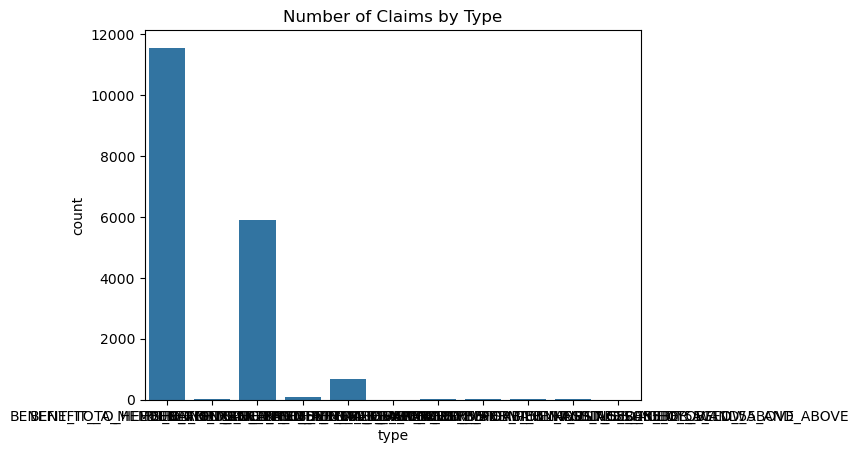

In [38]:
# Visualize claims by type
sns.countplot(x='type', data=claim)
plt.title('Number of Claims by Type')
plt.show()

In [ ]:
# Analyze contribution frequency by sector
sns.countplot(x='occupationType', data=member)
plt.title('Contribution Frequency by Sector')
plt.show()

In [ ]:
# Key trends in contributions
contribution_trends = contribution.groupby('date')['amount'].sum().plot(title='Contribution Trends Over Time')
plt.show()

In [ ]:
# Key trends in claims
claim_trends = claim.groupby('date')['benefitPaymentAmount'].sum().plot(title='Claim Trends Over Time')
plt.show()

In [ ]:
## 2
# Contribution frequency by sector and gender
contribution_freq = contribution.merge(member, on='id') \
    .groupby(['occupationType', 'gender'])['amount'].count().reset_index(name='contribution_count')
print(contribution_freq)

In [ ]:
# Average contribution amount by member type
avg_contribution = contribution.merge(member, on='id') \
    .groupby(['ageGroup', 'occupationType'])['amount'].mean().reset_index(name='avg_contribution')
print(avg_contribution)

In [ ]:
# Loss ratio
total_contributions = contribution.groupby('member_id')['amount'].sum()
total_claims = claim.groupby('member_id')['benefitPaymentAmount'].sum()
loss_ratio = total_claims / total_contributions
loss_ratio = loss_ratio.reset_index(name='loss_ratio')
print(loss_ratio)

In [ ]:
# Correlation analysis (e.g., age group vs. claim amount)
claim_analysis = claims.merge(member, on='id')
correlation = claim_analysis.groupby('ageGroup')['benefitPaymentAmount'].mean().reset_index()
print(correlation)

In [ ]:
# Contribution score calculation
members['contribution_score'] = contribution.groupby('member_id')['amount'].sum() / contribution.groupby('member_id')['amount'].mean()


In [ ]:
##3
# Performance analysis by member category
performance_analysis = contribution.merge(claim, on='member_id', how='left') \
    .merge(member, on='id') \
    .groupby(['occupationType', 'ageGroup']) \
    .agg(total_contributions=('amount', 'sum'), total_claims=('benefitPaymentAmount', 'sum'), member_count=('id', 'count'))
print(performance_analysis)

In [ ]:
# Identify less active members
X = 5
active_members = contribution.groupby('member_id')['amount'].count()
less_active_members = active_members[active_members <= X]  # X = threshold
print(less_active_members)

In [ ]:
# Relationship between contribution patterns and claim behavior
contribution_claim_behavior = contribution.groupby('member_id')['amount'].mean() \
    .reset_index().merge(claim.groupby('member_id')['benefitPaymentAmount'].mean().reset_index(), on='member_id')
print(contribution_claim_behavior)